In [5]:
1

1

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
PROJECT_PATH = '/home/swei20/PIML/PIML-SpecGridLearn/'
import sys
sys.path.insert(0, PROJECT_PATH)
[sys.path.append(i) for i in ['.', '..']]

[None, None]

In [3]:
import os
env_vars = !cat /home/swei20/PIML/PIMLspec/.env
for var in env_vars:
    key, value = var.split('=')
    os.environ[key] = value

In [4]:
import numpy as np
import copy
import matplotlib.pyplot as plt


In [5]:
PARAM={"step":10, "arm":"RedM", "box_name":"R"}

In [13]:
from specgridlearn.gateway.specgridpipelineIF import SpecGridPipelineIF

In [14]:
PIF = SpecGridPipelineIF()

In [15]:
PIF.interact(PARAM)

In [16]:
PIF.Object.__dict__

{'wave': array([7103.93535, 7111.04302, 7118.15752, 7125.27919, 7132.40811,
        7139.54389, 7146.687  , 7153.83731, 7160.99483, 7168.15929,
        7175.33091, 7182.50982, 7189.69599, 7196.88931, 7204.08979,
        7211.29745, 7218.51226, 7225.73457, 7232.96373, 7240.20049,
        7247.4442 , 7254.69511, 7261.95346, 7269.21914, 7276.4919 ,
        7283.77212, 7291.05935, 7298.35411, 7305.65621, 7312.96543,
        7320.28208, 7327.60596, 7334.9372 , 7342.27588, 7349.62183,
        7356.97509, 7364.3357 , 7371.70382, 7379.07911, 7386.46192,
        7393.852  , 7401.24956, 7408.65444, 7416.06675, 7423.48657,
        7430.91382, 7438.34849, 7445.79043, 7453.23998, 7460.69695,
        7468.16133, 7475.63325, 7483.1125 , 7490.59941, 7498.09378,
        7505.59557, 7513.10493, 7520.62169, 7528.14614, 7535.67812,
        7543.21735, 7550.76451, 7558.31905, 7565.88106, 7573.45084,
        7581.02797, 7588.61283, 7596.20528, 7603.80515, 7611.41284,
        7619.02807, 7626.65071, 7634.281

In [17]:
Object = PIF.Object
axis=1

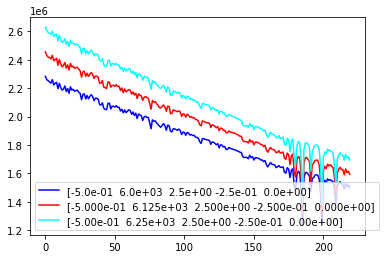

In [18]:
pmt0 = Object.box["mid"]
pmt2 = np.copy(pmt0)
PHYTICK = [0.25, 250, 0.5, 0.25, 0.25]

pmt2[axis] += PHYTICK[axis]
pmt1 = 0.5 * (pmt0 + pmt2)

flux0 = Object.get_coord_value(pmt0)
flux2 = Object.get_coord_value(pmt2)
flux1 = Object.interpolator(pmt1)

wave = np.arange(len(flux0))
plt.plot(wave, flux0, label= pmt0, c='b')
plt.plot(wave, flux1, label = pmt1, c='r')
plt.plot(wave, flux2, label = pmt2, c='cyan')
# plt.xlim(x, x+2204)
plt.legend()

In [19]:
Object.interp_storer("/home/swei20/PIML/PIMLprepNN/test/testdata")

In [20]:
from base.interface.gateway.basestorerIF import DataStorerIF

In [22]:
Object.Obs

In [31]:
storer = DataStorerIF.from_dir("/home/swei20/PIML/PIMLprepNN/test/testdata/", "Obs", ".pickle")
storer.store(Object.Obs)

In [24]:
from base.interface.gateway.baseloaderIF import DataLoaderIF

In [26]:
Obs1 = DataLoaderIF("./Obs.pickle").load()


In [29]:
Object.Obs.__dict__

{'sky': array([0.15077469, 0.1495934 , 0.14423648, 0.14433482, 0.14747137,
        0.14836056, 0.14531086, 0.14922931, 0.14873182, 0.14719386,
        0.14742225, 0.14853853, 0.14872931, 0.14798906, 0.14843427,
        0.14942387, 0.15094892, 0.15054792, 0.15677576, 0.19068839,
        0.17415853, 0.15311395, 0.15320229, 0.16651898, 0.17029691,
        0.15508382, 0.18025812, 0.1883331 , 0.16233235, 0.16886398,
        0.16669567, 0.15809255, 0.31407816, 0.52847163, 0.16061403,
        0.16233161, 0.16050382, 0.16841212, 0.16914596, 0.16412062,
        0.1623135 , 0.16355638, 0.17055147, 0.17649125, 0.16981551,
        0.16835615, 0.16894306, 0.16776282, 0.1689735 , 0.17108565,
        0.21743374, 0.21017425, 0.18578376, 0.17103679, 0.17821553,
        0.18634029, 0.19609469, 0.25088166, 0.22023136, 0.19109764,
        0.18437969, 0.18709035, 0.17928734, 0.24631951, 0.32752443,
        0.17920501, 0.17541241, 0.22140323, 0.18607524, 0.1782438 ,
        0.18310485, 0.18102709, 0.1781347

In [30]:
Obs1.__dict__

{'sky': array([0.15077469, 0.1495934 , 0.14423648, 0.14433482, 0.14747137,
        0.14836056, 0.14531086, 0.14922931, 0.14873182, 0.14719386,
        0.14742225, 0.14853853, 0.14872931, 0.14798906, 0.14843427,
        0.14942387, 0.15094892, 0.15054792, 0.15677576, 0.19068839,
        0.17415853, 0.15311395, 0.15320229, 0.16651898, 0.17029691,
        0.15508382, 0.18025812, 0.1883331 , 0.16233235, 0.16886398,
        0.16669567, 0.15809255, 0.31407816, 0.52847163, 0.16061403,
        0.16233161, 0.16050382, 0.16841212, 0.16914596, 0.16412062,
        0.1623135 , 0.16355638, 0.17055147, 0.17649125, 0.16981551,
        0.16835615, 0.16894306, 0.16776282, 0.1689735 , 0.17108565,
        0.21743374, 0.21017425, 0.18578376, 0.17103679, 0.17821553,
        0.18634029, 0.19609469, 0.25088166, 0.22023136, 0.19109764,
        0.18437969, 0.18709035, 0.17928734, 0.24631951, 0.32752443,
        0.17920501, 0.17541241, 0.22140323, 0.18607524, 0.1782438 ,
        0.18310485, 0.18102709, 0.1781347

In [34]:
Object.Obs.get_log_sigma(Object.flux[0])

array([0.00025008, 0.00025091, 0.00025074, 0.00025195, 0.00025209,
       0.00025104, 0.00025254, 0.00025221, 0.00025182, 0.00025336,
       0.00025222, 0.00025356, 0.00025441, 0.00025363, 0.00025295,
       0.00025491, 0.00025366, 0.00025501, 0.0002534 , 0.00025414,
       0.00025406, 0.00025448, 0.00025477, 0.00025449, 0.00025487,
       0.00025533, 0.00025715, 0.00025585, 0.00025581, 0.00025723,
       0.00025632, 0.00025723, 0.00025644, 0.00025622, 0.00025674,
       0.00025781, 0.00025718, 0.00025729, 0.00025749, 0.00025907,
       0.00025962, 0.00025887, 0.00026025, 0.0002609 , 0.000261  ,
       0.00025899, 0.00025905, 0.00026108, 0.00025992, 0.00026031,
       0.00026049, 0.00026002, 0.00026049, 0.00026063, 0.00026212,
       0.000261  , 0.00026286, 0.00026152, 0.00026271, 0.00026201,
       0.00026168, 0.00026191, 0.0002633 , 0.00026239, 0.00026368,
       0.00026286, 0.00026506, 0.00026318, 0.00026346, 0.00026374,
       0.00026577, 0.00026429, 0.00026415, 0.00026444, 0.00026

In [37]:
Obs1.get_log_sigma(Object.logflux[0], log=1)

array([0.00025008, 0.00025091, 0.00025074, 0.00025195, 0.00025209,
       0.00025104, 0.00025254, 0.00025221, 0.00025182, 0.00025336,
       0.00025222, 0.00025356, 0.00025441, 0.00025363, 0.00025295,
       0.00025491, 0.00025366, 0.00025501, 0.0002534 , 0.00025414,
       0.00025406, 0.00025448, 0.00025477, 0.00025449, 0.00025487,
       0.00025533, 0.00025715, 0.00025585, 0.00025581, 0.00025723,
       0.00025632, 0.00025723, 0.00025644, 0.00025622, 0.00025674,
       0.00025781, 0.00025718, 0.00025729, 0.00025749, 0.00025907,
       0.00025962, 0.00025887, 0.00026025, 0.0002609 , 0.000261  ,
       0.00025899, 0.00025905, 0.00026108, 0.00025992, 0.00026031,
       0.00026049, 0.00026002, 0.00026049, 0.00026063, 0.00026212,
       0.000261  , 0.00026286, 0.00026152, 0.00026271, 0.00026201,
       0.00026168, 0.00026191, 0.0002633 , 0.00026239, 0.00026368,
       0.00026286, 0.00026506, 0.00026318, 0.00026346, 0.00026374,
       0.00026577, 0.00026429, 0.00026415, 0.00026444, 0.00026

In [13]:
PIF.Object.Obs.get_log_sigma

<bound method Obs.get_log_sigma of <spec.center.core.obs.baseobs.Obs object at 0x7f3283a279a0>>

In [ ]:
np.digitize([7100,8850], wave)